In [7]:
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path

In [8]:
folder_path = os.getcwd()
files = os.listdir(folder_path)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)


colors = ['red', 'green', 'blue', 'purple', 'orange']

def filter_data(df):

    filtered_df =  df[(df['Cycle Index'] >= 30) & (df['Cycle Index'] <= 30)]
    filtered_df.reset_index(drop=True, inplace=True)
    temp_data = filtered_df['T1(℃)']
    capacity_data = filtered_df['Capacity(Ah)']
    DataPoint_data = filtered_df['DataPoint']

    return temp_data, DataPoint_data

for i, file in enumerate(excel_files_sort):
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, header=0, sheet_name='record')
    temp_data, DataPoint_data = filter_data(df)

    plt.grid()
    plt.scatter(DataPoint_data, temp_data, s=1, color=colors[i % len(colors)])



/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

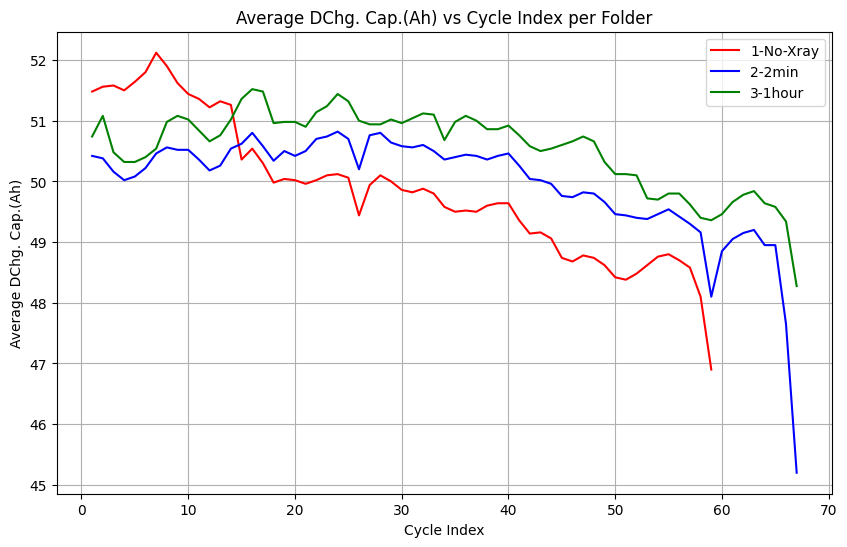

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folders
folders = ['1-No-Xray', '2-2min', '3-1hour']
colors = ['red', 'blue', 'green']  # Colors for each folder

# Function to filter data
def filter_data(df):
    filtered_df = df[df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

# Initialize a figure
plt.figure(figsize=(10, 6))

for folder, color in zip(folders, colors):
    # List all Excel files in the folder
    files = [f for f in os.listdir(folder) if f.endswith('.xlsx')]
    files_sort = sorted(files)
    
    # Initialize a DataFrame to collect all data
    all_data = pd.DataFrame()
    
    for file in files_sort:
        file_path = os.path.join(folder, file)
        # Read the Excel file
        df = pd.read_excel(file_path, header=0, sheet_name='cycle')
        filtered_df = filter_data(df)
        
        all_data = pd.concat([all_data, filtered_df], ignore_index=True)
    
    # Calculate the mean DChg. Cap.(Ah) for each Cycle Index
    mean_data = all_data.groupby('Cycle Index')['T1 Aux. Tmax(℃)'].mean().reset_index()
    
    # Plot the mean data
    plt.plot(mean_data['Cycle Index'], mean_data['T1 Aux. Tmax(℃)'], color=color, label=folder)

# Adjust plot settings
# plt.ylim(2.7, 3.1)
plt.xlabel('Cycle Index')
plt.ylabel('Average T1 Aux. Tmax(℃)')
plt.title('Average T1 Aux. Tmax(℃) vs Cycle Index per Folder')
plt.legend()
plt.grid(True)
plt.show()